In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [13]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/데이콘/상추의 생육 환경 생성

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/데이콘/상추의 생육 환경 생성


## 라이브러리

In [14]:
import pandas as pd
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')

# 깔금한 그래프 출력
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 전처리
- input : 28개의 상추별 **0 ~ 27일치 1시간 단위**로 측정
- target : 1 ~ 28일치 **일별** 상추 잎 중량 무게

In [17]:
all_train_input_list = sorted(glob.glob('./data/train_input/*.csv'))
all_train_target_list = sorted(glob.glob('./data/train_target/*.csv'))
all_test_input_list = sorted(glob.glob('./data/test_input/*.csv'))

### 데이터 병합
- 상추별 시간별 데이터 병합

In [18]:
def merge_csv(csv_list):
  df = pd.DataFrame()
  for i in range(len(csv_list)):
    data_path = csv_list[i]
    data = pd.read_csv(data_path)
    df = pd.concat([df,data],ignore_index=True)
  return df

In [19]:
train_input = merge_csv(all_train_input_list)
train_target = merge_csv(all_train_target_list)
test_input = merge_csv(all_test_input_list)

In [20]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)

(18816, 16)
(784, 2)
(3360, 16)


In [21]:
train_input[train_input['내부온도관측치'] == 0]

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
2031,0,15:00,0.0,0.0,560.254237,1.436618,1550.86,3101.72,18255.19,151143.6909,1813.6608,10160.472,3565.354,21154.016,23634.2048,182458.1789


In [22]:
train_input[train_input['시간당분무량'] < 0]

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
8665,25,01:00,19.825532,54.6,495.234043,1.251707,-537.52,0.0,0.0,0.0,0.0,0.0,0.0,469.95,0.0,469.95
8713,27,01:00,19.825532,54.6,495.234043,3.006822,-653.26,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00


In [23]:
train_input[train_input['시간당적색광량'] < 0]

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
3375,0,15:00:00.,27.384,74.1,410.12,0.388644,769.0,9228.0,-138371.2461,7116.43,-8793.6072,688.3968,-18570.8575,1372.254,-165735.7108,9177.0808


In [24]:
train_input['obs_time'] = train_input['obs_time'].map(lambda x: str(x)[:2])

In [25]:
train_input[(train_input['DAT'] == 0) & (train_input['obs_time'] == '15')]['시간당청색광량'].value_counts()

 0.0000        17
 3565.3540      2
 4621.1750      1
 3563.7875      1
-18570.8575     1
 3565.3540      1
 3562.2210      1
 3696.9400      1
 7989.1500      1
 9242.3500      1
 3566.9205      1
Name: 시간당청색광량, dtype: int64

In [26]:
print(train_input[(train_input['DAT'] == 0) & (train_input['obs_time'] == '15')]['내부온도관측치'].median())
print(train_input[(train_input['DAT'] == 0) & (train_input['obs_time'] == '15')]['내부온도관측치'].mean())
print(train_input[(train_input['DAT'] == 0) & (train_input['obs_time'] == '15')]['내부습도관측치'].median())
print(train_input[(train_input['DAT'] == 0) & (train_input['obs_time'] == '15')]['내부습도관측치'].mean())

27.85583314895625
27.46201254701998
53.6000000299361
51.560314940325554


### 결측치 확인

In [ ]:
train_input.isnull().sum()

DAT         0
obs_time    0
내부온도관측치     0
내부습도관측치     0
co2관측치      0
ec관측치       0
시간당분무량      0
일간누적분무량     0
시간당백색광량     0
일간누적백색광량    0
시간당적색광량     0
일간누적적색광량    0
시간당청색광량     0
일간누적청색광량    0
시간당총광량      0
일간누적총광량     0
dtype: int64

In [ ]:
train_target.isnull().sum()

DAT                   0
predicted_weight_g    0
dtype: int64

In [ ]:
test_input.isnull().sum()

DAT         0
obs_time    0
내부온도관측치     0
내부습도관측치     0
co2관측치      0
ec관측치       0
시간당분무량      0
일간누적분무량     0
시간당백색광량     0
일간누적백색광량    0
시간당적색광량     0
일간누적적색광량    0
시간당청색광량     0
일간누적청색광량    0
시간당총광량      0
일간누적총광량     0
dtype: int64

### 시간별 변수 확인

In [ ]:
train_input['obs_time'] = pd.to_datetime(train_input['obs_time']).map(lambda x: x.hour)
test_input['obs_time'] = pd.to_datetime(test_input['obs_time']).map(lambda x: x.hour)

In [ ]:
train_input.head()

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0,0,25.300000,81.835000,536.016667,1.407439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,25.680357,81.264286,528.696429,1.409003,126.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,25.273333,81.471666,532.833333,1.406913,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,25.355000,81.398334,545.566667,1.406689,126.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,25.391667,81.483333,558.583333,1.411070,0.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hour_plot(df):
  plt.figure(figsize=(30,15))
  for i in range(13):
    plt.subplot(7,2,i+1)
    sns.lineplot(x = df['obs_time'], y=df.columns[2+i], data=df)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
    plt.title(df.columns[2+i],size=20)
    plt.ylabel('')

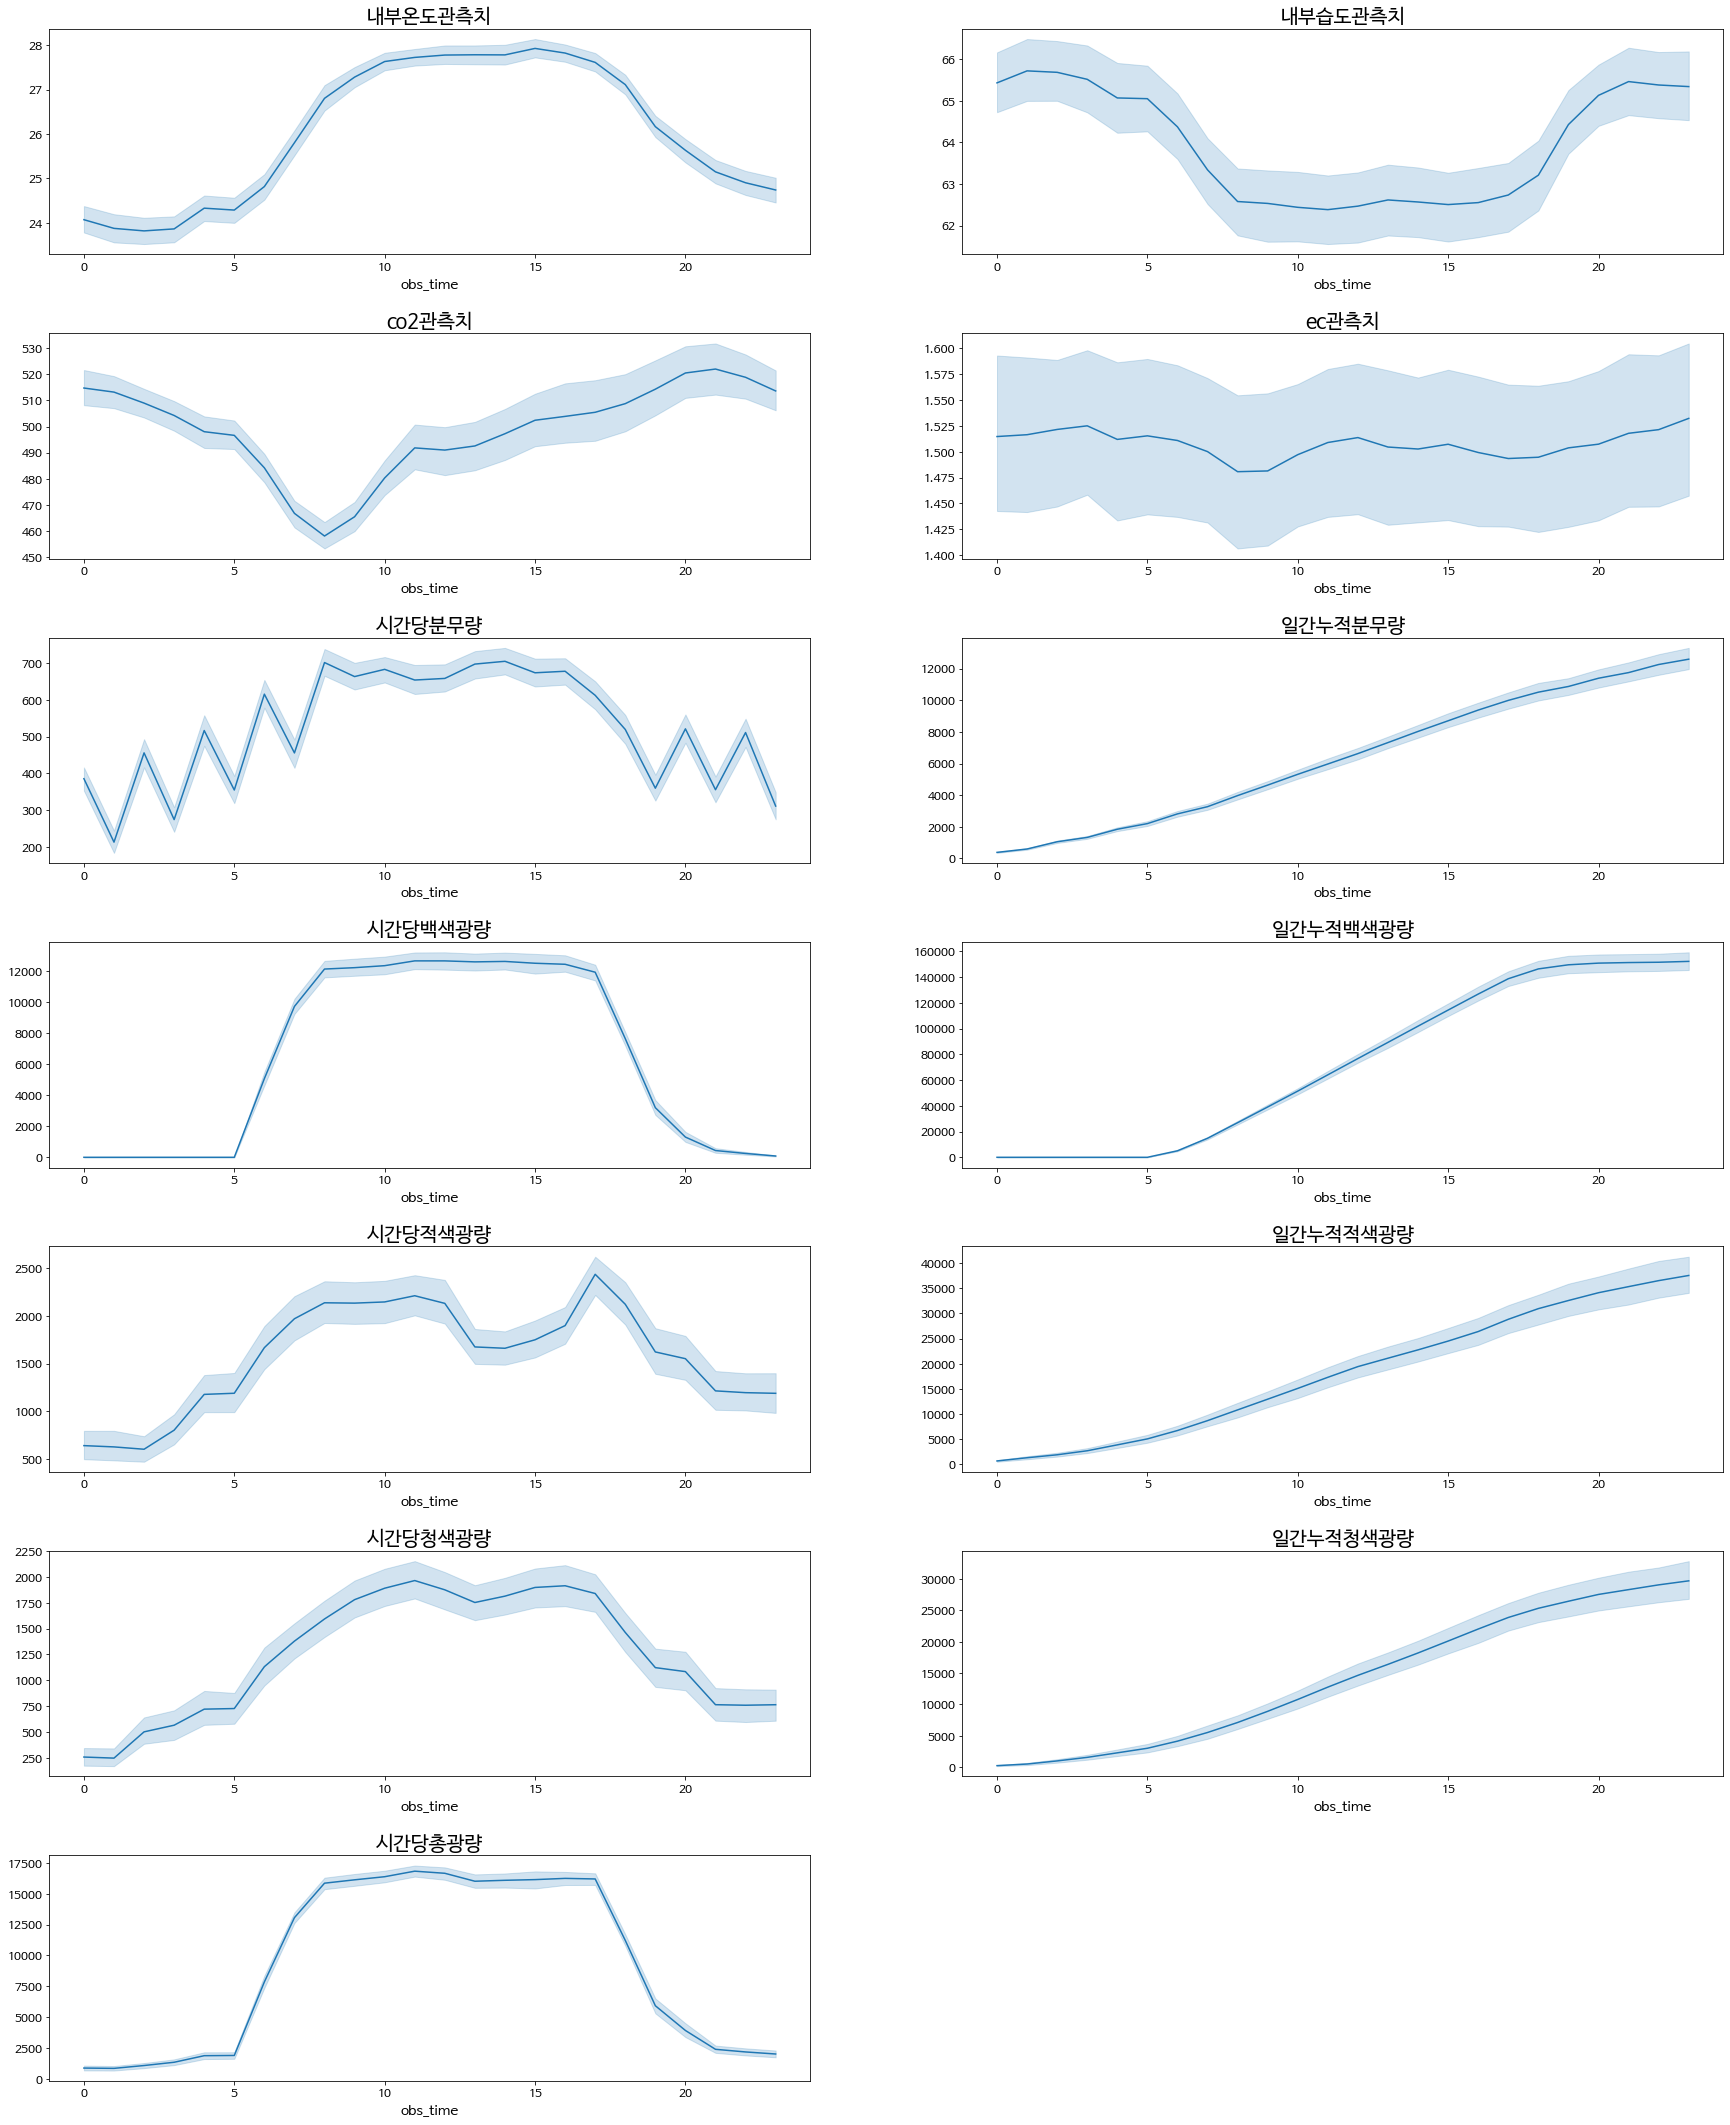

In [ ]:
hour_plot(train_input)

### 일별 평균 처리

In [30]:
def day_mean(df):
  # 날짜, 시간 컬럼 삭제
  df = df.drop(['DAT','obs_time'],axis=1)
  new_df = pd.DataFrame(columns=df.columns)
  
  # 24개의 행마다의 평균값으로 일별 타겟 값에 매칭
  for idx in range(len(train_target)):
    input_list = df[24*idx:24*(idx+1)].mean().values
    new_df.loc[idx] = input_list
  
  return new_df

In [31]:
train = day_mean(train_input)
test = day_mean(test_input)
print(train.shape)
print(test.shape)

(784, 14)
(784, 14)


In [32]:
# train 에는 target 컬럼 추가
target = train_target.drop(['DAT'],axis=1)
total_train = pd.concat([train,target],axis=1)
total_train.rename(columns = {'predicted_weight_g':'target'},inplace=True)

In [ ]:
total_train.head(3)

,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량,target
0,27.030709,78.061290,535.094296,1.393616,165.052917,1955.456667,10653.244142,122118.454483,570.7681,6544.8719,0.0,0.0,11224.012242,128663.326383,0.167719
1,27.542751,78.075041,523.986590,1.384431,165.856667,2010.048750,10680.188596,122406.721467,571.1818,6546.5267,0.0,0.0,11251.370396,128953.248167,0.181787
2,26.678482,77.590048,539.236170,1.392745,170.570833,2028.688750,10655.177954,122085.708592,569.8028,6528.3239,0.0,0.0,11224.980754,128614.032492,0.265921


In [ ]:
test.head(3)

,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,27.489730,61.372104,465.722917,1.037389,510.255417,6240.247083,8728.198258,102309.897363,0.0,0.0,0.0,0.0,8728.198258,102309.897363
1,28.668803,63.148023,463.661311,1.034501,383.964167,5089.534583,8729.874229,102297.649883,0.0,0.0,0.0,0.0,8729.874229,102297.649883
2,28.407405,61.045223,488.883086,1.033113,496.323750,6725.426667,8734.386458,102355.922100,0.0,0.0,0.0,0.0,8734.386458,102355.922100


## 그래프 출력
### 히스토그램 & 박스플롯

In [ ]:
def make_plot(df,column_name):
  # 그래프 사이즈 조절
  fig, ax = plt.subplots(1,2,figsize=(12,7))

  # 히스토그램
  sns.distplot(x = df[column_name],ax=ax[0]).set(xlabel='',ylabel='')

  # 박스플롯
  sns.boxplot(x = df[column_name],ax=ax[1]).set(xlabel='')

  # 그래프 간격조절
  # plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
  
  # 그래프 제목
  plt.suptitle(column_name,size=20)
  
  plt.show()

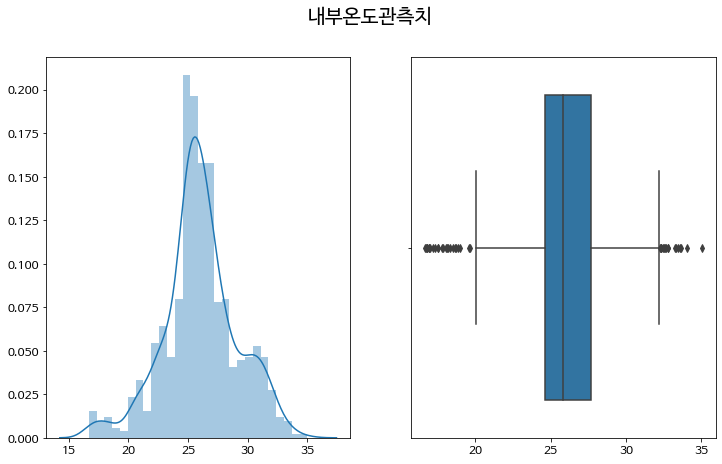

In [ ]:
make_plot(total_train,'내부온도관측치')

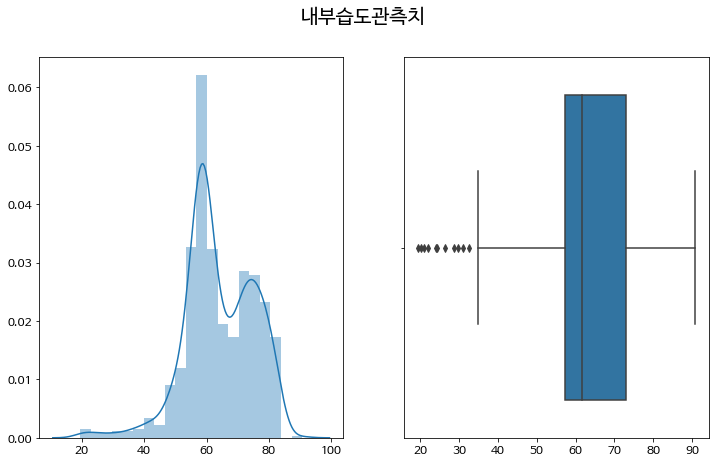

In [ ]:
make_plot(total_train,'내부습도관측치')

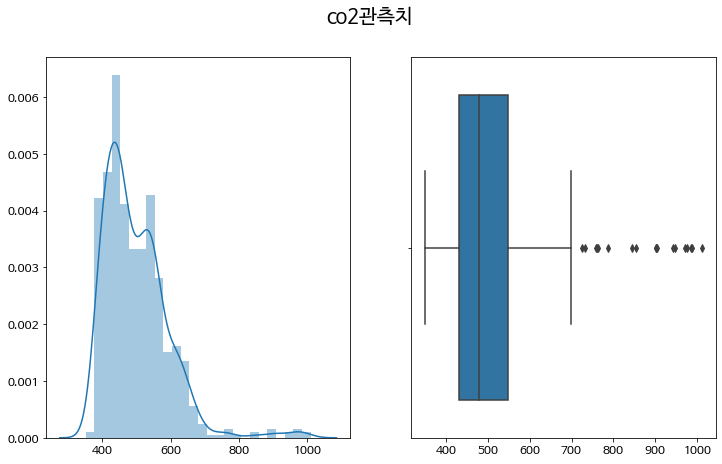

In [ ]:
make_plot(total_train,'co2관측치')

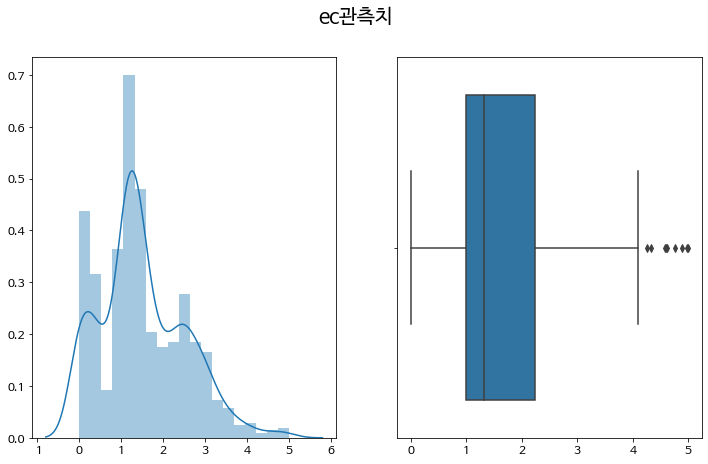

In [ ]:
make_plot(total_train,'ec관측치')

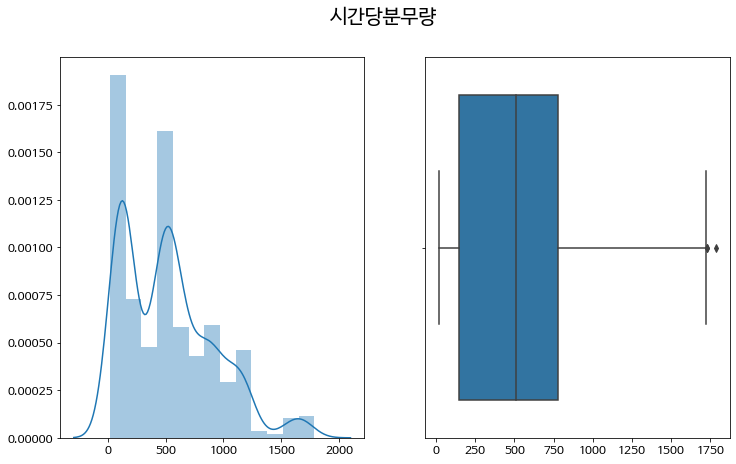

In [ ]:
make_plot(total_train,'시간당분무량')

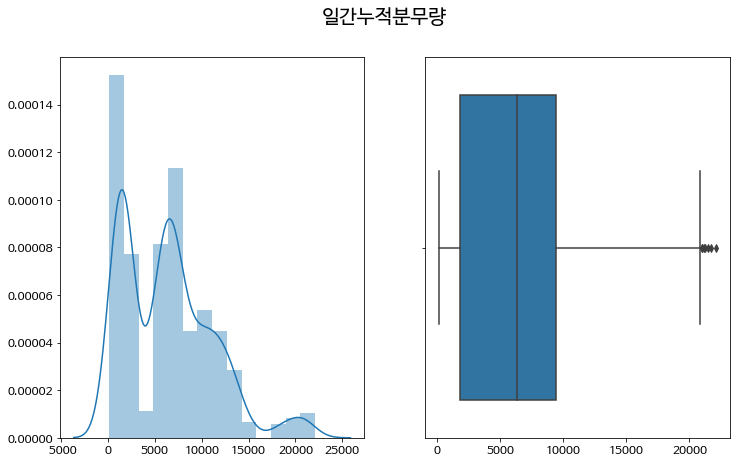

In [ ]:
make_plot(total_train,'일간누적분무량')

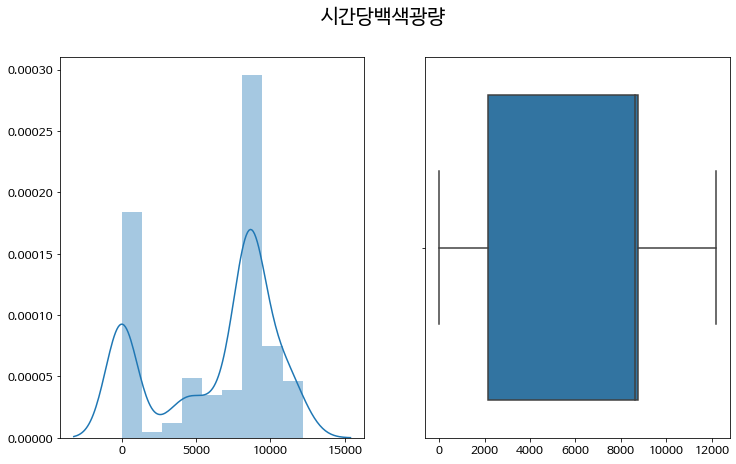

In [ ]:
make_plot(total_train,'시간당백색광량')

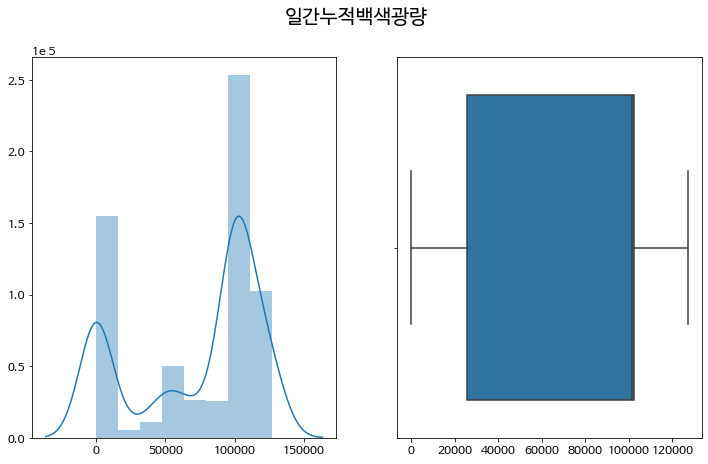

In [ ]:
make_plot(total_train,'일간누적백색광량')

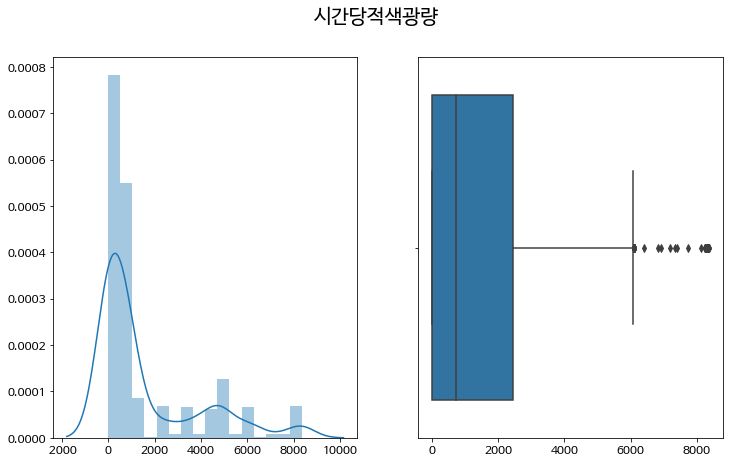

In [ ]:
make_plot(total_train,'시간당적색광량')

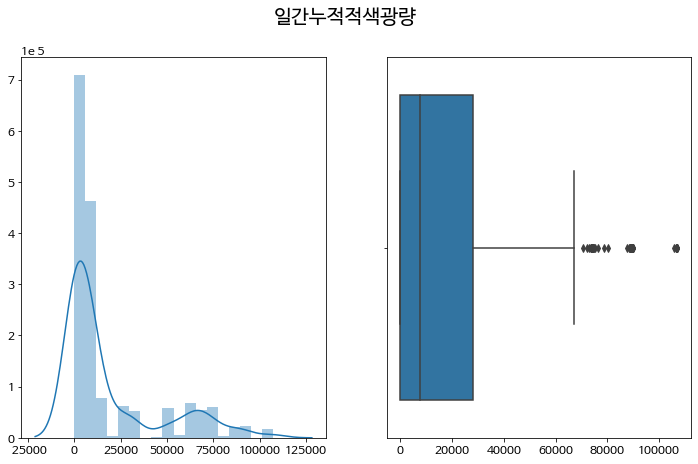

In [ ]:
make_plot(total_train,'일간누적적색광량')

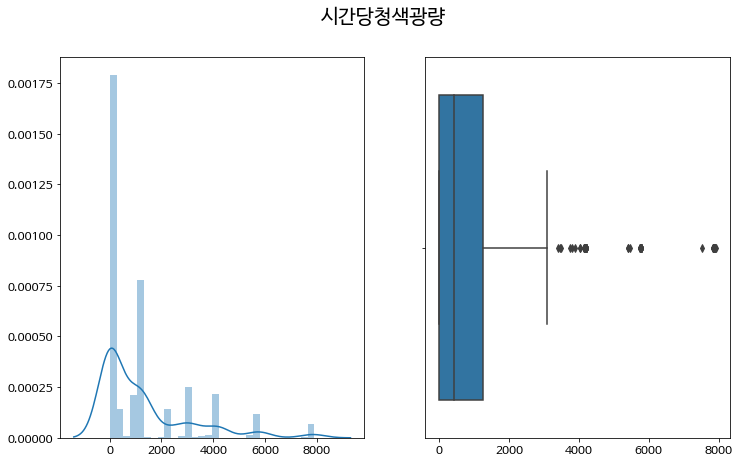

In [ ]:
make_plot(total_train,'시간당청색광량')

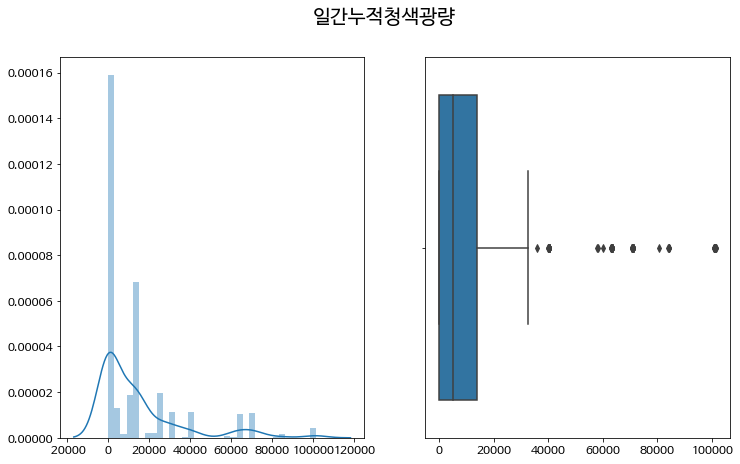

In [ ]:
make_plot(total_train,'일간누적청색광량')

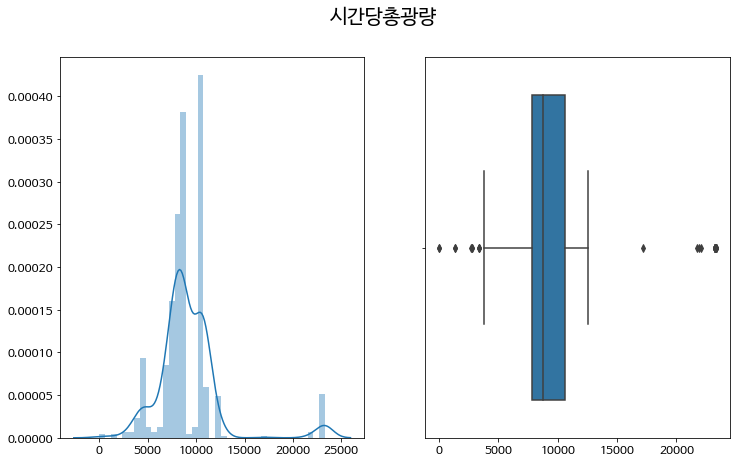

In [ ]:
make_plot(total_train,'시간당총광량')

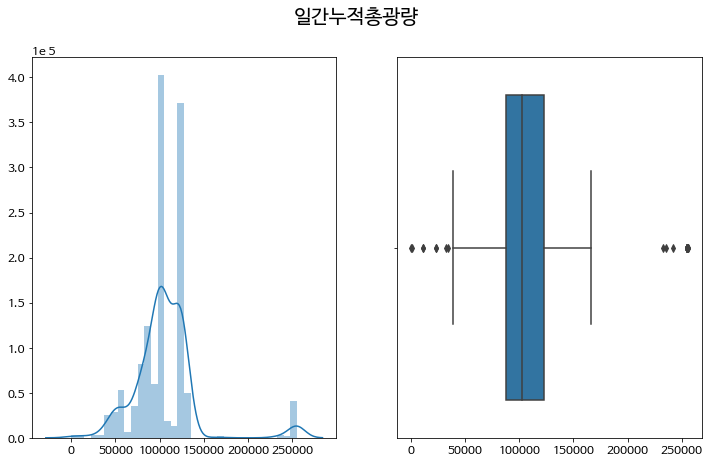

In [ ]:
make_plot(total_train,'일간누적총광량')

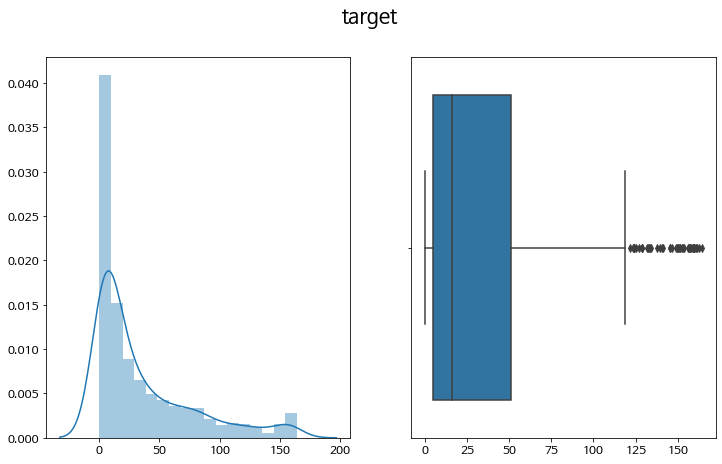

In [ ]:
make_plot(total_train,'target')

### 상관관계
- 상추 잎 중량과는 습도, CO2, 분무량, 백색광량에서 약한 상관관계가 있다고 보인다.

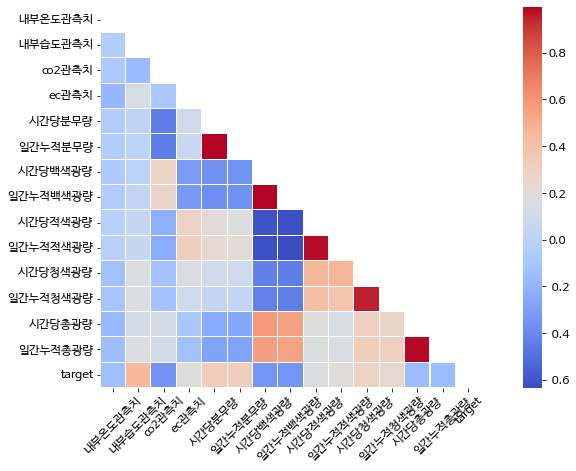

In [34]:
# 각 변수 간 상관관계 확인
plt.figure(figsize=(15,7))
mask = np.zeros_like(total_train.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(total_train.corr(), cmap='coolwarm',linewidth=0.05,square=True,mask=mask)
plt.xticks(rotation=45)
plt.show()